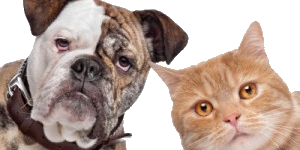

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score # didnt use
from sklearn.model_selection import cross_val_predict  # didnt use
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score  # didnt use
from sklearn.metrics import f1_score  # didnt use
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier

In [3]:
import os
import cv2

In [4]:
train_dir=r'C:\Users\User\Downloads\dogs-vs-cats\train\train'
image_size=100

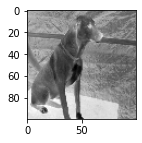

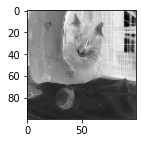

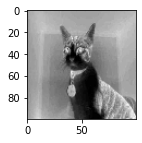

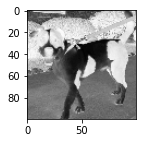

In [46]:
for i in range(10,50,10):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train.to_numpy()[2200+i].reshape(100,100) , cmap="gist_yarg")
    plt.show()

fanction that classify the label of the picture acording cat/dog to 0/1:

In [7]:
def label_img(img):
    word_label=img.split('.')[-3]
    if word_label=='cat':return [0]
    elif word_label =='dog':return [1]

fanctions that creat data we can work with:

In [8]:
def create_train_data():
    training_data=[]
    for img in (os.listdir(train_dir)):
        label=label_img(img)
        path=os.path.join(train_dir,img)
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
        training_data.append([img,label])
    np.save('train_data.npy',training_data)
    return training_data

In [10]:
train_data=create_train_data()

one imge:

In [11]:
train_data[0]

[array([[168, 174, 177, ..., 211, 208, 205],
        [168, 174, 177, ..., 213, 209, 206],
        [168, 174, 177, ..., 216, 210, 208],
        ...,
        [127, 129, 132, ...,   3,   3,   2],
        [126, 128, 131, ...,   3,   3,   3],
        [123, 125, 129, ...,   2,   2,   2]], dtype=uint8),
 [0]]

__from matrix to dataframe:__

fanction that take bit's matrix and turns them to row of features:

In [14]:
def create_pic_row(y):
    df3=pd.DataFrame(train_data[y][0][0])
    for x in range (1,100):
        df2=pd.DataFrame(train_data[y][0][x])
        df3= df3.append(df2)
    df5=pd.DataFrame(train_data[y][1])
    df3= df3.append(df5)
    df3=df3.T
    return df3

United the rows into one dataset:

In [ ]:
data=create_pic_row(0)
for y in range(1,24999):
    count=y
    data1=create_pic_row(y) 
    data=data.append(data1) 

fixing the indexs:

In [19]:
columns=np.arange(0,10001)
columns
rows=np.arange(0,24999)
rows

array([    0,     1,     2, ..., 24996, 24997, 24998])

In [20]:
columns=np.arange(0,10001)
columns
rows=np.arange(0,24999)
rows
data=data.set_axis(columns, axis='columns')
data=data.set_index(rows)

chaing 1000 to label:

In [21]:
data = data.rename(columns={10000: 'label'})

I downloaded the data to the computer and upload it from there because it takes hours to run:

In [22]:
data.to_csv(r'C:\Users\User\Downloads\gmar\File Name.csv', index = False)

In [3]:
data = pd.read_csv(r'C:\Users\User\Downloads\gmar\File Name.csv')

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


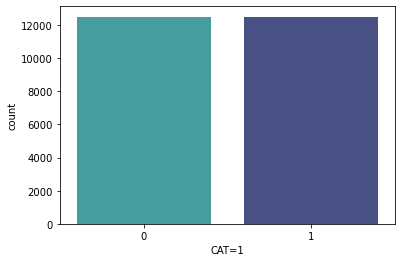

In [6]:
import seaborn as sns

sns.countplot(x='label', data=data, palette="mako_r")
plt.xlabel("CAT=1")
plt.show()

__split the data into train and test sets:__

In [7]:
f_train_set, f_test_set = train_test_split(data, test_size=0.2, random_state=4)

f_x_test=f_test_set.iloc[ : , 0:10000]
f_y_test=f_test_set.iloc[ : , 10000]

__split the train into train and validation sets:__

and StandardScaler:

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = f_train_set.drop('label', axis=1)
y = f_train_set.label

scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

__PCA:__

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train345 = pca.fit_transform(X_train)
X_test345 = pca.transform(X_test)

In [10]:
pca.n_components_

345

__models:__

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [50]:
def pred345(model):
    model.fit(X_train345,y_train)
    y_pred = model.predict(X_test345)
    print(model , "Accuracy :  " , accuracy_score(y_test, y_pred))

In [13]:
pred(DecisionTreeClassifier())
pred(LogisticRegression())
pred(KNeighborsClassifier(n_neighbors=17))
pred(AdaBoostClassifier())
pred(XGBClassifier())
pred(GradientBoostingClassifier())
pred(RandomForestClassifier())

DecisionTreeClassifier() Accuracy :   0.551
LogisticRegression() Accuracy :   0.55775
KNeighborsClassifier(n_neighbors=17) Accuracy :   0.60125
AdaBoostClassifier() Accuracy :   0.5915
[12:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=

In [51]:
r1 = LogisticRegression()
r2 = DecisionTreeClassifier()
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = XGBClassifier()
vr = VotingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
pred(vr)
vr = StackingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
pred(vr)

[17:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                        

__best acuracy in  GradientBoostingClassifier ,0.629__

__try to reduse the n_components:__

runing on RForest, looking for the best n_components in range 10-345:

In [18]:
arr = []
for i in range(10,345,20):
    pca = PCA(n_components = i)
    X2D = pca.fit_transform(X_train)
    X_testt = pca.transform(X_test)
 
    RForest = RandomForestClassifier(criterion="gini")
    RForest.fit(X2D, y_train)
    prediction = RForest.predict(X_testt)
    arr.append(accuracy_score(y_test, prediction))
    print(i)
    


maxS = max(arr)*100
print ("the maximum RForest score is: " + str(maxS) + "% while k=1")


10
30
50
70
90
110
130
150
170
190
210
230
250
270
290
310
330
the maximum KNN score is: 63.425% while k=1


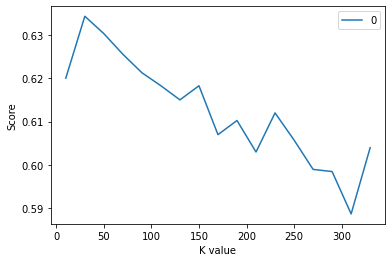

In [21]:
pd.DataFrame(arr, index=[10, 30,50,70,90,110,130,150,170,190,210,230,250,270,290,310,330]).plot()
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

looking for the best n_components in range 10-100:

In [ ]:
arr = []
for i in range(10,100,10):
    pca = PCA(n_components = i)
    X2D = pca.fit_transform(X_train)
    X_testt = pca.transform(X_test)
 
    RForest = RandomForestClassifier(criterion="gini")
    RForest.fit(X2D, y_train)
    prediction = RForest.predict(X_testt)
    arr.append(accuracy_score(y_test, prediction))
    
maxS = max(arr)*100


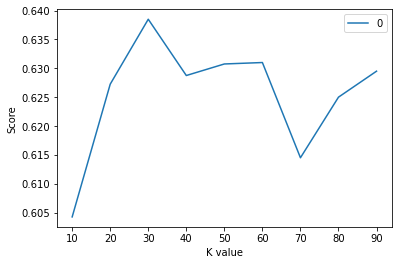

In [24]:
pd.DataFrame(arr, index=[10,20,30,40,50,60,70,80,90]).plot()
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

we can see that __n_components=30__ is the best for RForest 

lets cheak on the ather models:

In [26]:
pca = PCA(n_components = 30)
X_train30 = pca.fit_transform(X_train)
X_test30 = pca.transform(X_test)

In [13]:
def pred30(model):
    model.fit(X_train30,y_train)
    y_pred = model.predict(X_test30)
    print(model , "Accuracy :  " , accuracy_score(y_test, y_pred))
  

In [28]:
pred30(DecisionTreeClassifier())
pred30(LogisticRegression())
pred30(KNeighborsClassifier(n_neighbors=17))
pred30(AdaBoostClassifier())
pred30(XGBClassifier())
pred30(GradientBoostingClassifier())
pred30(RandomForestClassifier())

DecisionTreeClassifier() Accuracy :   0.54475
LogisticRegression() Accuracy :   0.56475
KNeighborsClassifier(n_neighbors=17) Accuracy :   0.61425
AdaBoostClassifier() Accuracy :   0.59475
[13:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsamp

In [30]:
r1 = LogisticRegression()
r2 = DecisionTreeClassifier()
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = XGBClassifier()
vr = VotingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
pred30(vr)
vr = StackingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
pred30(vr)

[13:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                        

from the trainig on the validation we can see that


__the RForest is thr best model__

__runing on the test:__

In [31]:
f_train_set, f_test_set = train_test_split(data, test_size=0.2, random_state=4)

X = data.drop('label', axis=1)
y = data.label

scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [32]:
pca = PCA(n_components = 30)
X_train30 = pca.fit_transform(X_train)
X_test30 = pca.transform(X_test)

In [33]:
pred30(RandomForestClassifier())

RandomForestClassifier() Accuracy :   0.624


Training Accuracy : 1.0
Testing Accuracy : 0.6364

              precision    recall  f1-score   support

           0       0.62      0.67      0.65      2478
           1       0.65      0.60      0.63      2522

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000



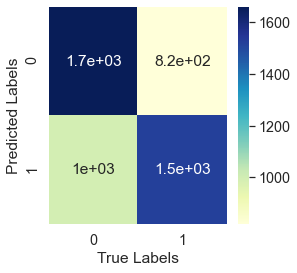

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

results={}
RForest = RandomForestClassifier()
RForest.fit(X_train, y_train)
    #model prediction
y_pred = RForest.predict(X_test)
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
    # add accuracy score to 'results'
results[RForest]=metrics.accuracy_score(y_test, y_pred)
    # evaluating the model
print("Training Accuracy :", RForest.score(X_train, y_train))
print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))


__conclution:__

__the RForest model get the best Accuracy: 0.624__

n_components = 30